# Understanding MODIS Data

MODIS (Moderate Resolution Imaging Spectroradiometer) refers to a sensor that is being flown on both the Terra and Aqua Satelites. 

The MODIS LST products are created as a sequence of products beginning with a swath
(scene) and progressing, through spatial and temporal transformations, to daily, eight-day
and monthly global gridded products.

We will utilise the level 3 data, coded as MOD11A1 (for the Terra based sensor) and MYD11A1 (for the Aqua based sensor).
This data is distributed as a tile of daily LST (Day and Night) at 1km spatial resolution. It is generated by mapping the pixels in the MOD11_L2 products for a day to a georeferenced sinusoidal projection. - [Product User Guide](https://landweb.modaps.eosdis.nasa.gov/QA_WWW/forPage/user_guide/061/MOD11_C61_UsersGuide_revSudipta_revPete_Final.pdf)


In [1]:
import fsspec
from pathlib import Path

import rioxarray
import xarray as xr

In [2]:
fs = fsspec.filesystem('')
files = fs.glob(Path(Path.home(),'heat_center/data/remote-sensing/modis/MOD11A1/*.hdf'))

In [3]:
files[:5]

['/home/pmarsh/heat_center/data/remote-sensing/modis/MOD11A1/MOD11A1.A2000055.h20v11.061.2020043121006.hdf',
 '/home/pmarsh/heat_center/data/remote-sensing/modis/MOD11A1/MOD11A1.A2000056.h20v11.061.2020043121006.hdf',
 '/home/pmarsh/heat_center/data/remote-sensing/modis/MOD11A1/MOD11A1.A2000057.h20v11.061.2020043121006.hdf',
 '/home/pmarsh/heat_center/data/remote-sensing/modis/MOD11A1/MOD11A1.A2000058.h20v11.061.2020043121006.hdf',
 '/home/pmarsh/heat_center/data/remote-sensing/modis/MOD11A1/MOD11A1.A2000059.h20v11.061.2020043121006.hdf']

In [4]:
len(files)

8331

In [5]:
ds = rioxarray.open_rasterio(files[10])
ds

<xarray.Dataset>
Dimensions:          (band: 1, x: 1200, y: 1200)
Coordinates:
  * band             (band) int64 1
  * x                (x) float64 2.224e+06 2.225e+06 ... 3.334e+06 3.335e+06
  * y                (y) float64 -2.224e+06 -2.225e+06 ... -3.334e+06 -3.335e+06
    spatial_ref      int64 0
Data variables:
    LST_Day_1km      (band, y, x) uint16 ...
    Emis_32          (band, y, x) uint8 ...
    Clear_day_cov    (band, y, x) uint16 ...
    Clear_night_cov  (band, y, x) uint16 ...
    QC_Day           (band, y, x) uint8 ...
    Day_view_time    (band, y, x) uint8 ...
    Day_view_angl    (band, y, x) uint8 ...
    LST_Night_1km    (band, y, x) uint16 ...
    QC_Night         (band, y, x) uint8 ...
    Night_view_time  (band, y, x) uint8 ...
    Night_view_angl  (band, y, x) uint8 ...
    Emis_31          (band, y, x) uint8 ...
Attributes: (12/94)
    ALGORITHMPACKAGEACCEPTANCEDATE:     102004
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR11A
    ALGORITHMPACKAGEVERSION:            6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Terra
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            -29.9958333333333
    SPSOPARAMETERS:                     2484 and 3323
    TileID:                             51020011
    VERSIONID:                          61
    VERTICALTILENUMBER:                 11
    WESTBOUNDINGCOORDINATE:             21.2802631447996

The MODIS level 3 data uses a sinusoidal projection, or more specifically a corrected version of SR-ORG:6842, describing the global sinusoidal projection used by many MODIS land products. The projection uses a spherical projection ellipsoid but a WGS84 datum ellipsoid. Not all projection software recognizes the "semi_major" and "semi_minor" arguments to Sinusoidal projections. If yours does not, you may be happier using SR-ORG:6842 and coping with the fact that it may introduce datum-shift errors down the road. This is a variation on SR-ORG:6965 that uses the authalic mean radius of the Earth for projection rather than the major radius, in keeping with files distributed by NASA/USGS. - https://spatialreference.org/ref/sr-org/modis-sinusoidal-3/



In [6]:
ds.rio.crs

CRS.from_wkt('PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

Fortunately for us rioxarray does support this hybrid projection and so reprojecting to an "EPSG:4326" projection used by reanalysis models is as simple as:

In [7]:
ds = ds.rio.reproject("EPSG:4326")
ds

<xarray.Dataset>
Dimensions:          (x: 1359, y: 1017, band: 1)
Coordinates:
  * x                (x) float64 21.29 21.3 21.31 21.32 ... 34.62 34.63 34.64
  * y                (y) float64 -20.0 -20.01 -20.02 ... -29.97 -29.98 -29.99
  * band             (band) int64 1
    spatial_ref      int64 0
Data variables:
    LST_Day_1km      (band, y, x) uint16 15198 15204 15230 15264 ... 0 0 0 0
    Emis_32          (band, y, x) uint8 248 248 249 248 248 248 ... 0 0 0 0 0 0
    Clear_day_cov    (band, y, x) uint16 3387 3648 3867 3963 4000 ... 0 0 0 0 0
    Clear_night_cov  (band, y, x) uint16 2000 1996 1981 2000 2000 ... 0 0 0 0 0
    QC_Day           (band, y, x) uint8 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 0
    Day_view_time    (band, y, x) uint8 109 109 109 109 109 ... 255 255 255 255
    Day_view_angl    (band, y, x) uint8 105 105 105 105 106 ... 255 255 255 255
    LST_Night_1km    (band, y, x) uint16 14630 14621 14602 14598 ... 0 0 0 0
    QC_Night         (band, y, x) uint8 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 0
    Night_view_time  (band, y, x) uint8 231 231 231 231 231 ... 255 255 255 255
    Night_view_angl  (band, y, x) uint8 81 81 81 81 81 ... 255 255 255 255 255
    Emis_31          (band, y, x) uint8 247 246 247 246 246 246 ... 0 0 0 0 0 0
Attributes: (12/94)
    ALGORITHMPACKAGEACCEPTANCEDATE:     102004
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR11A
    ALGORITHMPACKAGEVERSION:            6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Terra
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            -29.9958333333333
    SPSOPARAMETERS:                     2484 and 3323
    TileID:                             51020011
    VERSIONID:                          61
    VERTICALTILENUMBER:                 11
    WESTBOUNDINGCOORDINATE:             21.2802631447996

Note how our 'x' and 'y' axes are now longitude and latitude steps rather than metres from a specified datum.

Let's rename the coordinates to reflect this, and drop the band dimension as there is only 1 band in this dataset.

In [8]:
ds = ds.rename({'x':'lon', 'y':'lat'})
ds = ds.sel(band = 1)
ds

<xarray.Dataset>
Dimensions:          (lon: 1359, lat: 1017)
Coordinates:
  * lon              (lon) float64 21.29 21.3 21.31 21.32 ... 34.62 34.63 34.64
  * lat              (lat) float64 -20.0 -20.01 -20.02 ... -29.97 -29.98 -29.99
    band             int64 1
    spatial_ref      int64 0
Data variables:
    LST_Day_1km      (lat, lon) uint16 15198 15204 15230 15264 15309 ... 0 0 0 0
    Emis_32          (lat, lon) uint8 248 248 249 248 248 248 ... 0 0 0 0 0 0
    Clear_day_cov    (lat, lon) uint16 3387 3648 3867 3963 4000 ... 0 0 0 0 0
    Clear_night_cov  (lat, lon) uint16 2000 1996 1981 2000 2000 ... 0 0 0 0 0
    QC_Day           (lat, lon) uint8 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 0
    Day_view_time    (lat, lon) uint8 109 109 109 109 109 ... 255 255 255 255
    Day_view_angl    (lat, lon) uint8 105 105 105 105 106 ... 255 255 255 255
    LST_Night_1km    (lat, lon) uint16 14630 14621 14602 14598 14608 ... 0 0 0 0
    QC_Night         (lat, lon) uint8 0 0 0 0 0 0 0 0 0 0 ... 3 3 3 3 3 3 3 3 0
    Night_view_time  (lat, lon) uint8 231 231 231 231 231 ... 255 255 255 255
    Night_view_angl  (lat, lon) uint8 81 81 81 81 81 82 ... 255 255 255 255 255
    Emis_31          (lat, lon) uint8 247 246 247 246 246 246 ... 0 0 0 0 0 0
Attributes: (12/94)
    ALGORITHMPACKAGEACCEPTANCEDATE:     102004
    ALGORITHMPACKAGEMATURITYCODE:       Normal
    ALGORITHMPACKAGENAME:               MOD_PR11A
    ALGORITHMPACKAGEVERSION:            6
    ASSOCIATEDINSTRUMENTSHORTNAME.1:    MODIS
    ASSOCIATEDPLATFORMSHORTNAME.1:      Terra
    ...                                 ...
    SOUTHBOUNDINGCOORDINATE:            -29.9958333333333
    SPSOPARAMETERS:                     2484 and 3323
    TileID:                             51020011
    VERSIONID:                          61
    VERTICALTILENUMBER:                 11
    WESTBOUNDINGCOORDINATE:             21.2802631447996

Our dataset has 12 variables.

In [9]:
list(ds)

['LST_Day_1km',
 'Emis_32',
 'Clear_day_cov',
 'Clear_night_cov',
 'QC_Day',
 'Day_view_time',
 'Day_view_angl',
 'LST_Night_1km',
 'QC_Night',
 'Night_view_time',
 'Night_view_angl',
 'Emis_31']

# Land Surface Temperature

Day time image:

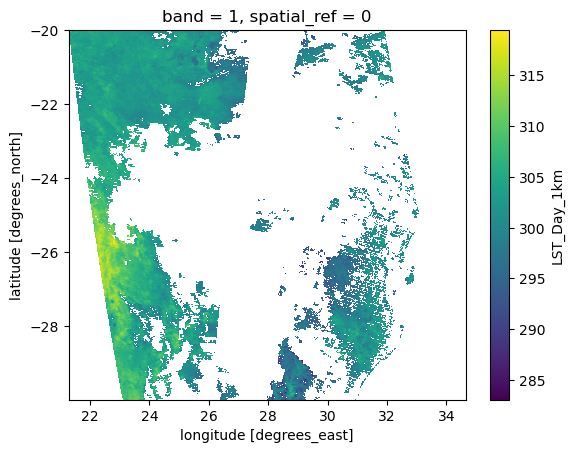

In [10]:
ds['LST_Day_1km'] = ds.LST_Day_1km.where(ds.LST_Day_1km != ds.LST_Day_1km.attrs['_FillValue']) #set fill values to 0
ds['LST_Day_1km'] = ds['LST_Day_1km'] * ds.LST_Day_1km.attrs['scale_factor'] 
ds['LST_Day_1km'].plot()

Night time image:

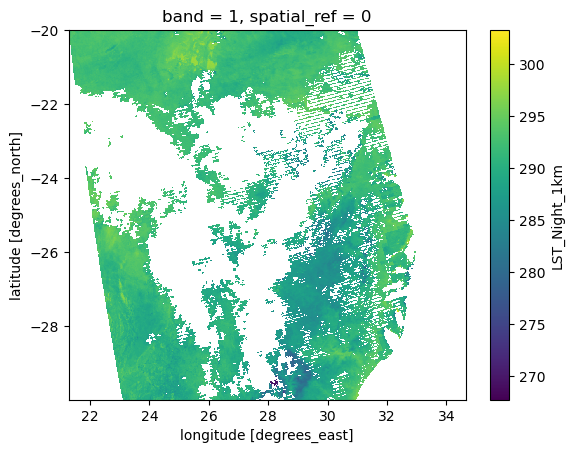

In [11]:
ds['LST_Night_1km'] = ds.LST_Night_1km.where(ds.LST_Night_1km != ds.LST_Night_1km.attrs['_FillValue']) #set fill values to 0
ds['LST_Night_1km'] = ds['LST_Night_1km'] * ds.LST_Night_1km.attrs['scale_factor'] 
ds['LST_Night_1km'].plot()

That was easy enough, but for our needs we would like to understand what time these tiles were captured and what information can be gained from the quality, clear coverage, view angle and emissivity variables. 

# Capture Time

Let's start by identifying what time in UTC the LST_Day_1km data was captured:

In [12]:
ds['Day_view_time'] = ds.Day_view_time.where(ds.Day_view_time != ds.Day_view_time.attrs['_FillValue']) #set fill values to 0
ds['Day_view_time'] = ds.Day_view_time * ds.Day_view_time.attrs['scale_factor'] #adjust by scale factor

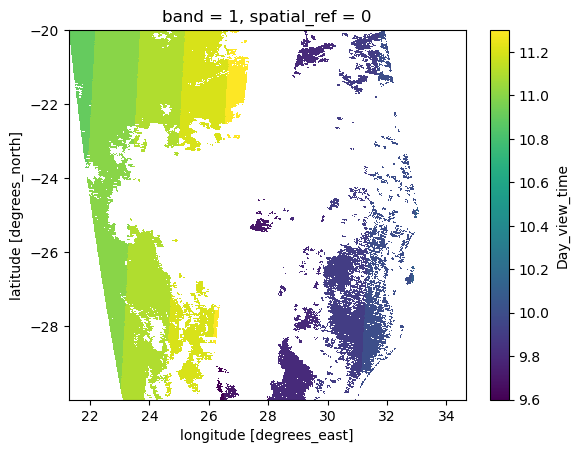

In [13]:
ds['satelittes'].plot()

We can see how the Local Solar Time, captured by the Day_view_time variable, is increasing with longitude, from 10.2 (10:12 am) to 11.0 (11 am). We are however more used to working with data in standard UTC time. 

UTC time can be calculated from local solar time as: local solar time - (longitude in degrees / 15 degrees)

In [14]:
import numpy as np
import datetime

In [15]:
lon_arr = np.tile(ds.lon.values,(len(ds.lat.values),1)) #create an array of longitude values
lon_arr = lon_arr/15 #divide by 15 to construct solar time offset

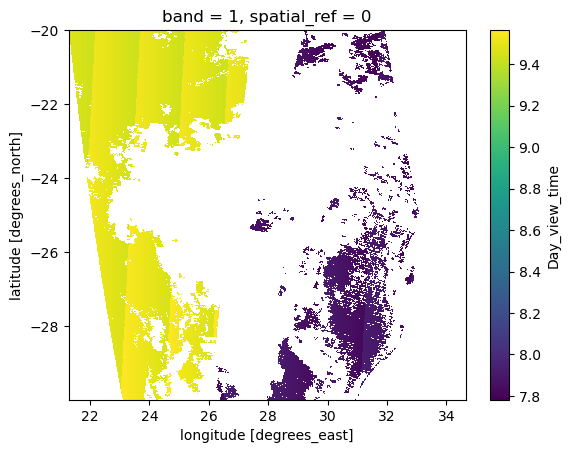

In [16]:
(ds['Day_view_time'] - lon_arr).plot()

The range between UTC times calculated by this technique is 0.2 hours (12 minutes), which is should be accurate enough for our needs. 

My initial thought to simplify pre-processing going forward was to use the UTC time at the latitude and longitude of Johannesburg (and Abidjan) to aproximate the UTC time for the full tile, however in situations where that location is clouded this technique doesn't work. Another approach could be to find the nearest non-nan pixel, at the same longitude, but this isn't always possible on very cloudy days and so would require some esoteric logic. As a compromise and what seems the simplest solution is that I have simply taken the average time across all valid pixels. 

First we get the date from the file name:

In [17]:
acquisition = files[0].split('.')[1]
year = int(acquisition[1:5])
day_of_year = int(acquisition[5:])

Then we get the hour and minute as the average across the tile

In [18]:
day_time_hours = (ds['Day_view_time'] - lon_arr).mean()
hour = int(day_time_hours)
minute = int(60 * (day_time_hours - hour))
time_day = np.datetime64(datetime.datetime(year, 1, 1, hour, minute, 0) + datetime.timedelta(days = day_of_year))
print(time_day)

2000-02-25T09:02:00.000000


Similarly for night time, first setting the fill value and scaling, as we did with the Day_view_time:

In [19]:
#calc night
ds['Night_view_time'] = ds.Night_view_time.where(ds.Night_view_time != ds.Night_view_time.attrs['_FillValue']) #set fill values to 0
ds['Night_view_time'] = ds.Night_view_time * ds.Night_view_time.attrs['scale_factor'] #adjust by scale factor
night_time_hours = (ds['Night_view_time'] - lon_arr).mean()
hour = int(night_time_hours)
minute = int(60 * (night_time_hours - hour))
time_night = np.datetime64(datetime.datetime(year, 1, 1, hour, minute, 0) + datetime.timedelta(days = day_of_year))
print(time_night)

2000-02-25T21:37:00.000000


Let's have a look at how this acquisition time changes between days:

In [20]:
def get_day_night_time(file):
    ds = rioxarray.open_rasterio(file)
    ds = ds.rio.reproject("EPSG:4326")
    ds = ds.rename({'x':'lon', 'y':'lat'})
    ds = ds.sel(band = 1)
    #date
    acquisition = files[0].split('.')[1]
    year = int(acquisition[1:5])
    day_of_year = int(acquisition[5:])
    #day time
    ds['Day_view_time'] = ds.Day_view_time.where(ds.Day_view_time != ds.Day_view_time.attrs['_FillValue']) #set fill values to 0
    ds['Day_view_time'] = ds.Day_view_time * ds.Day_view_time.attrs['scale_factor'] #adjust by scale factor
    try:
        day_time_hours = (ds['Day_view_time'] - lon_arr).mean()
        hour = int(day_time_hours)
        minute = int(60 * (day_time_hours - hour))
        time_day = np.datetime64(datetime.datetime(year, 1, 1, hour, minute, 0) + datetime.timedelta(days = day_of_year))
    except:
        time_day = np.nan #no clear tile
    #night time
    ds['Night_view_time'] = ds.Night_view_time.where(ds.Night_view_time != ds.Night_view_time.attrs['_FillValue']) #set fill values to 0
    ds['Night_view_time'] = ds.Night_view_time * ds.Night_view_time.attrs['scale_factor'] #adjust by scale factor
    try:
        night_time_hours = (ds['Night_view_time'] - lon_arr).mean()
        if night_time_hours < 0:
            night_time_hours = night_time_hours + 24
        hour = int(night_time_hours)
        minute = int(60 * (night_time_hours - hour))
        time_night = np.datetime64(datetime.datetime(year, 1, 1, hour, minute, 0) + datetime.timedelta(days = day_of_year))
    except:
        time_night = np.nan
    return time_day,time_night

Have a quick look at 10 random files:

In [21]:
import random
for i in random.sample(range(0, len(files)), 10):
    print(get_day_night_time(files[i]))

(numpy.datetime64('2000-02-25T07:54:00.000000'), numpy.datetime64('2000-02-25T21:13:00.000000'))
(numpy.datetime64('2000-02-25T08:56:00.000000'), numpy.datetime64('2000-02-25T21:05:00.000000'))
(numpy.datetime64('2000-02-25T08:26:00.000000'), numpy.datetime64('2000-02-25T20:58:00.000000'))
(numpy.datetime64('2000-02-25T08:37:00.000000'), numpy.datetime64('2000-02-25T20:45:00.000000'))
(numpy.datetime64('2000-02-25T09:04:00.000000'), numpy.datetime64('2000-02-25T21:25:00.000000'))
(numpy.datetime64('2000-02-25T08:00:00.000000'), numpy.datetime64('2000-02-25T21:15:00.000000'))
(numpy.datetime64('2000-02-25T08:10:00.000000'), numpy.datetime64('2000-02-25T21:18:00.000000'))
(numpy.datetime64('2000-02-25T08:43:00.000000'), numpy.datetime64('2000-02-25T20:51:00.000000'))
(numpy.datetime64('2000-02-25T08:29:00.000000'), numpy.datetime64('2000-02-25T20:38:00.000000'))
(numpy.datetime64('2000-02-25T08:40:00.000000'), numpy.datetime64('2000-02-25T21:22:00.000000'))


We have only consider Terra data so far, let's see how the viewing time of Aqua differs. Aqua data is encoded as MYD11A1.

In [22]:
files2 = fs.glob(Path(Path.home(),'heat_center/data/remote-sensing/modis/MYD11A1/*.hdf'))
import random
for i in random.sample(range(0, len(files2)), 10):
    print(get_day_night_time(files2[i]))

(numpy.datetime64('2000-02-25T11:35:00.000000'), numpy.datetime64('2000-02-25T22:33:00.000000'))
(numpy.datetime64('2000-02-25T11:46:00.000000'), numpy.datetime64('2000-02-25T23:54:00.000000'))
(numpy.datetime64('2000-02-25T11:41:00.000000'), numpy.datetime64('2000-02-25T22:25:00.000000'))
(numpy.datetime64('2000-02-25T12:22:00.000000'), numpy.datetime64('2000-02-25T23:24:00.000000'))
(numpy.datetime64('2000-02-25T12:16:00.000000'), numpy.datetime64('2000-02-25T23:11:00.000000'))
(numpy.datetime64('2000-02-25T12:04:00.000000'), numpy.datetime64('2000-02-25T23:01:00.000000'))
(numpy.datetime64('2000-02-25T12:05:00.000000'), numpy.datetime64('2000-02-25T23:36:00.000000'))
(numpy.datetime64('2000-02-25T12:04:00.000000'), numpy.datetime64('2000-02-25T23:00:00.000000'))
(numpy.datetime64('2000-02-25T12:19:00.000000'), numpy.datetime64('2000-02-25T23:16:00.000000'))
(numpy.datetime64('2000-02-25T11:58:00.000000'), numpy.datetime64('2000-02-25T23:45:00.000000'))


The aqcusition times are roughly 8am (10am local) in the morning and 9pm (11pm local) at night for Terra and 12 am (2 pm local) and 11 pm (1 am local) for Aqua, but the exact time varies by up to 45 minutes. Whether or not this will be important to out future efforts is not clear at present. Consolidating the data into a single dataset with these precise time steps will form an awkward array that may be hard to work with. I suggest rather consolidating it using regular approximate times and saving the exact times as a seperate variable.  ---- actually maybe it won't will test

# Clear Day Coverage

This level 3 data is made as a composite of multiple level 2 datasets. In cases where there are multiple high quality captures of the same location the LST is captured as the average between points. The Clear_day_cov captures how many data points have been used to create each pixel.

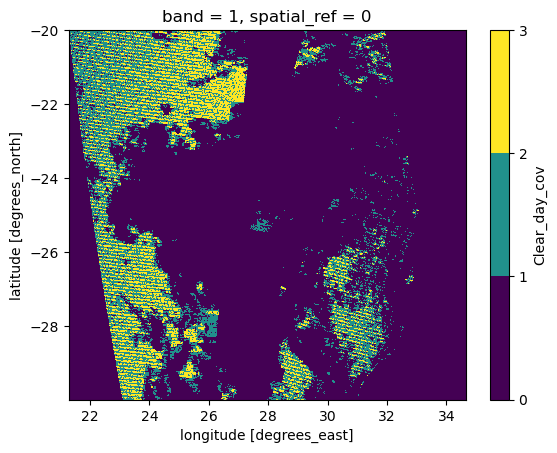

In [23]:
(ds['Clear_day_cov']*ds.Clear_day_cov.attrs['scale_factor']).plot(levels = [0,1,2,3])

# Quality Control

The quality control variable is certainly of interest to us, but is also by far the least user friendly in it's native format; which is a bitwise representation. This is efficient from a data storage point of view but not from a human interpretation point of view.

In [24]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

## Bit flags defined for QC_day and QC_Night in MOD11A1. 
Note that bit 0 is the least significant bit.

| bits | Long Name | Description
| :----: | :----: | :----: |
| 1 & 0 | Mandatory QA flags | Detailed Quality Description
| 3 & 2 | Data quality flag | Binary Quality Description
| 5 & 4 | Emis Error flag | average emissivity error
| 7 & 6 | LST LST Error flag | average LST error

### 1 & 0 Mandatory QA flags

| key | value
| :----: | :----: |
| 00 | LST produced, good quality, not necessary to examine more detailed QA
| 01 | LST produced, other quality, recommend examination of more detailed QA
| 10 | LST not produced due to cloud effects
| 11 | LST not produced primarily due to reasons other than cloud


### 3 & 2 Data quality flag

| key | value
| :----: | :----: |
| 00 | good data quality
| 01 | other quality data
| 10 | TBD
| 11 | TBD


### 5 & 4 Emis Error flag

| key | value
| :----: | :----: |
| 00 | average emissivity error <= 0.01
| 01 | average emissivity error <= 0.02
| 10 | average emissivity error <= 0.04
| 11 | average emissivity error > 0.04

### 7 & 6 LST LST Error flag

| key | value
| :----: | :----: |
| 00 | average LST error <= 1K
| 01 | average LST error <= 2K
| 10 | average LST error <= 3K

The simplest option is to only consider bit 0 == 0 data and thus only work with high quality data, let's see how much data this removes:

In [25]:
#http://karthur.org/2021/fast-bitflag-unpacking-python.html
def dec2bin_unpack(x, axis = None):
    'For an arbitrary NumPy array a input'
    axis = x.ndim if axis is None else axis
    return np.unpackbits(x[...,None], axis = axis)[...,-8:]

In [26]:
unpacked_qc_day = dec2bin_unpack(ds.QC_Day.values)
ds['QC_Day_overall_QC'] = (['lat', 'lon'], unpacked_qc_day[:,:,0])

In [27]:
import matplotlib.pyplot as plt

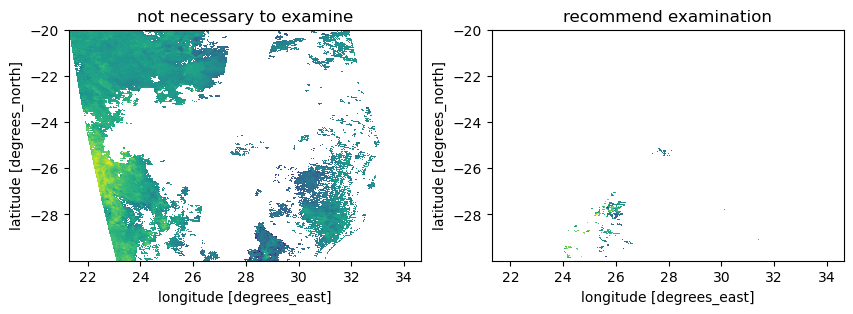

In [28]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,3))

ds['LST_Day_1km'].where(ds['QC_Day_overall_QC'] == 0).plot(ax = axes[0], add_colorbar=False)
axes[0].title.set_text('not necessary to examine')
ds['LST_Day_1km'].where(ds['QC_Day_overall_QC'] == 1).plot(ax = axes[1], add_colorbar=False)
axes[1].title.set_text('recommend examination')

Maybe we only consider LST depending on average error:

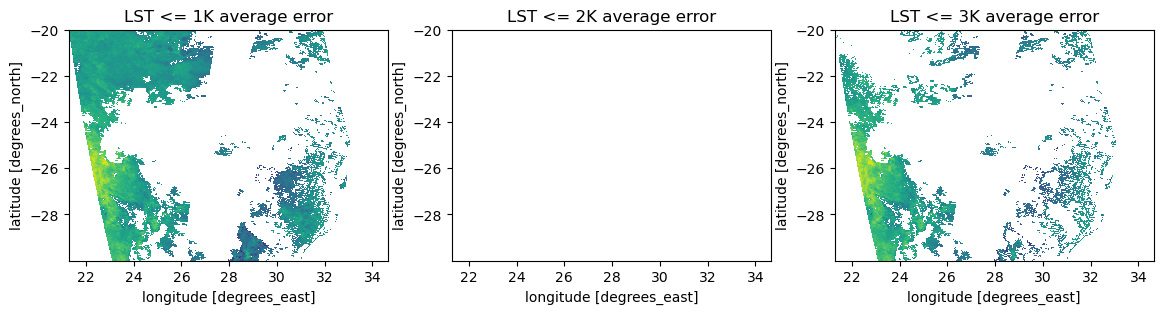

In [29]:
ds['QC_Day_LST_HIGH'] = (['lat', 'lon'], unpacked_qc_day[:,:,6])
ds['QC_Day_LST_LOW'] = (['lat', 'lon'], unpacked_qc_day[:,:,7])

fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(14,3))

ds['LST_Day_1km'].where(ds['QC_Day_LST_HIGH'] == 0).plot(ax = axes[0], add_colorbar=False)
axes[0].title.set_text('LST <= 1K average error')
ds['LST_Day_1km'].where(ds['QC_Day_LST_HIGH'] == 1).plot(ax = axes[1], add_colorbar=False)
axes[1].title.set_text('LST <= 2K average error')
ds['LST_Day_1km'].where(ds['QC_Day_LST_LOW'] == 1).plot(ax = axes[2], add_colorbar=False)
axes[2].title.set_text('LST <= 3K average error')

Not really sure how to interperet that...

And the binary descriptor:

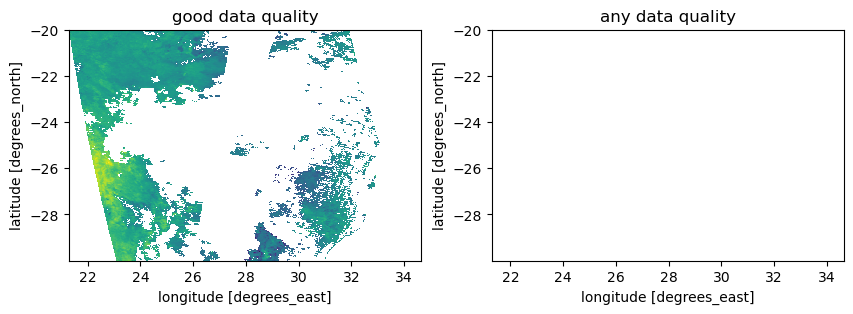

In [30]:
ds['QC_Day_Binary'] = (['lat', 'lon'], unpacked_qc_day[:,:,2])

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,3))

ds['LST_Day_1km'].where(ds['QC_Day_Binary'] == 0).plot(ax = axes[0], add_colorbar=False)
axes[0].title.set_text('good data quality')
ds['LST_Day_1km'].where(ds['QC_Day_Binary'] == 1).plot(ax = axes[1], add_colorbar=False)
axes[1].title.set_text('any data quality')

So it's all good quality unless already nan....

My feeling is to keep the full QC bitwise data in the harmonised dataset just in case, and then only encode the Mandatory QA flags, first bit, which I have named QC_Day_overall_QC as a seperate variable, as we can then choose to include all data or only data flagged as: 'LST produced, good quality, not necessary to examine more detailed QA'

# View Angle

The scale factor and offset for Day_view_angle and Night_view_angle in C6
Level-3 MODIS LST products have been changed so that a negative sign of the viewing
angle means MODIS viewing the grid from east. The view zenith angle itself is always a
positive number, the zenith angle from nadir. The information of MODIS viewing the grid
from east or west may be important in understanding the view angle effect in the temporal
variations in LSTs, especially in rugged regions

In [31]:
ds['Day_view_angl'] = ds.Day_view_angl.where(ds.Day_view_angl != ds.Day_view_angl.attrs['_FillValue'])
ds['Day_view_angl'] = ds['Day_view_angl'] + ds['Day_view_angl'].attrs['add_offset']

ds['Night_view_angl'] = ds.Night_view_angl.where(ds.Night_view_angl != ds.Night_view_angl.attrs['_FillValue'])
ds['Night_view_angl'] = ds['Night_view_angl'] + ds['Night_view_angl'].attrs['add_offset']

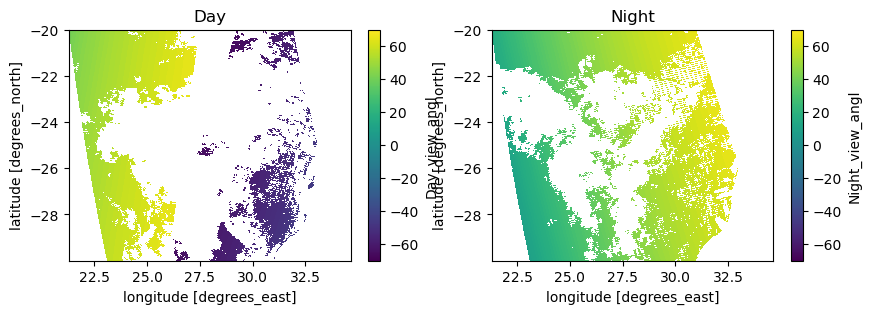

In [32]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(10,3))

ds['Day_view_angl'].plot(vmin = -70, vmax = 70, ax = axes[0])
axes[0].title.set_text('Day')
ds['Night_view_angl'].plot(vmin = -70, vmax = 70,ax = axes[1])
axes[1].title.set_text('Night')

and the Aqua sensors:

In [33]:
ds2 = rioxarray.open_rasterio(files2[12])
ds2 = ds2 .rio.reproject("EPSG:4326")
ds2 = ds2 .rename({'x':'lon', 'y':'lat'})
ds2 = ds2 .sel(band = 1)

ds2 ['Day_view_angl'] = ds2 .Day_view_angl.where(ds2 .Day_view_angl != ds2 .Day_view_angl.attrs['_FillValue'])
ds2 ['Day_view_angl'] = ds2 ['Day_view_angl'] + ds2 ['Day_view_angl'].attrs['add_offset']

ds2 ['Night_view_angl'] = ds2 .Night_view_angl.where(ds2 .Night_view_angl != ds2 .Night_view_angl.attrs['_FillValue'])
ds2 ['Night_view_angl'] = ds2 ['Night_view_angl'] + ds2 ['Night_view_angl'].attrs['add_offset']

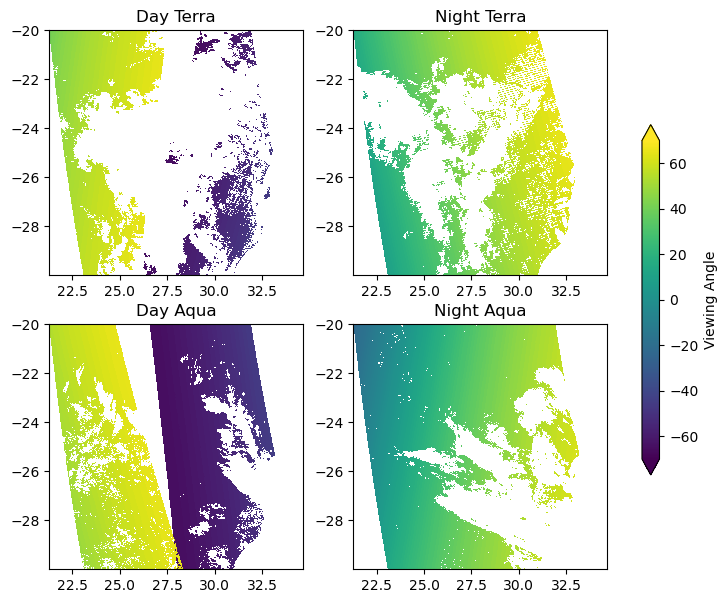

In [34]:
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(9,7))

axes = axes.flatten()

ds['Day_view_angl'].plot(vmin = -70, vmax = 70, ax = axes[0], add_colorbar=False)
axes[0].title.set_text('Day Terra')

ds['Night_view_angl'].plot(vmin = -70, vmax = 70,ax = axes[1], add_colorbar=False)
axes[1].title.set_text('Night Terra')

ds2['Day_view_angl'].plot(vmin = -70, vmax = 70, ax = axes[2], add_colorbar=False)
axes[2].title.set_text('Day Aqua')
p = ds2['Night_view_angl'].plot(vmin = -70, vmax = 70,ax = axes[3], add_colorbar=False)
axes[3].title.set_text('Night Aqua')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

fig.colorbar(p, ax=axes.ravel().tolist(), label = 'Viewing Angle', shrink = 0.65, extend = 'both')

# Emissivity

Emissivity values in bands 31 and 32 are estimated by the classification-based
emissivity method (Snyder and Wan, 1998) according to land cover types in the
pixel determined by the input data in Land Cover (MCDLC1KM) and daily Snow
Cover (MOD10_L2). The land-cover product generated from MODIS data is
used in the MODIS LST processing.
Because the range of diurnal variation in LSTs over the seasons at the bare soil
sites is very wide it is necessary to use two separate sets of split-window
algorithm coefficients for the type of bare soil in the hot and warm bare soil zone
(HAWBSZ) within latitude range from −38° to 49.5°, one set for daytime LSTs
and another for nighttime LSTs. Atmospheric radiative transfer simulations were
made with MODTRAN4 code (Berk et al., 1999) in wide atmospheric and LST
conditions: the range of the atmospheric surface temperature (Ts-air) is set as
280–325K for the daytime and 275–305K for the nighttime; the atmospheric
column water vapor varies from nearly zero to 5.5cm; and the range of (LST –
Ts-air) is set as from 8–29K for daytime LSTs and from −10–4K for nighttime
LSTs. A quadratic term of the difference between brightness temperatures in
bands 31 and 32 was added into the original viewing angle dependent splitwindow algorithm in order to improve the LST retrieval accuracy slightly (Wan,
2014).
A large uncertainty may exist in such estimated emissivity values in semi-arid
and arid areas. Therefore, a prototype emissivity adjustment model was developed by
comparing the (T31–T32) values in MODIS data to simulation values estimated from
column water vapor (cwv) and surface air temperature (Ta-surf), and correspondingly
adjusting the emissivity in band 31 (em31 or ε31) with a value in range of ±0.0063 and the
band 32 emissivity em32 (ε32) by the same amount in the opposite direction (Wan, 2014). - [Product User Guide](https://landweb.modaps.eosdis.nasa.gov/QA_WWW/forPage/user_guide/061/MOD11_C61_UsersGuide_revSudipta_revPete_Final.pdf)

In [35]:
ds['Emis_32'] = ds.Emis_32.where(ds.Emis_32 != ds.Emis_32.attrs['_FillValue'])
ds['Emis_32'] = ds['Emis_32']*ds['Emis_32'].attrs['scale_factor'] + ds['Emis_32'].attrs['add_offset']

In [36]:
ds['Emis_31'] = ds.Emis_31.where(ds.Emis_31 != ds.Emis_31.attrs['_FillValue'])
ds['Emis_31'] = ds['Emis_31']*ds['Emis_31'].attrs['scale_factor'] + ds['Emis_31'].attrs['add_offset']

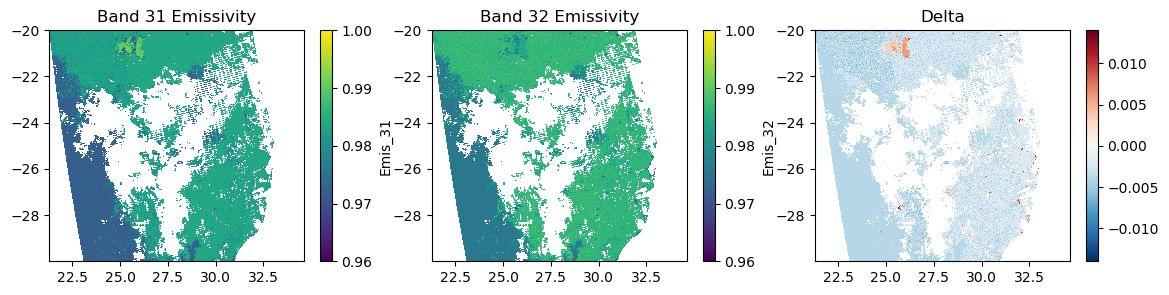

In [37]:
fig, axes = plt.subplots(nrows=1,ncols=3,figsize=(14,3))

ds['Emis_31'].plot(vmin = 0.96, vmax = 1, ax = axes[0])
axes[0].title.set_text('Band 31 Emissivity')
ds['Emis_32'].plot(vmin = 0.96, vmax = 1,ax = axes[1])
axes[1].title.set_text('Band 32 Emissivity')
(ds['Emis_31'] - ds['Emis_32']).plot(ax = axes[2])
axes[2].title.set_text('Delta')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

So very little difference between the two bands, except in a small region at 20 S 26 E, Which I believe is as a result of the Nwetwe and Sua salt pans in Botswana. 